In [2]:
import tensorflow as tf

In [3]:
from tensorflow import keras

In [4]:
print('Hi')

Hi


In [5]:
import matplotlib.pyplot as plt

In [6]:
import random

In [7]:
#load training and testing data

In [8]:
mnist = tf.keras.datasets.mnist

In [10]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [12]:
x_train = x_train / 255
x_test = x_test / 255

In [13]:
# define netwrok architecture using keras

In [18]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128,activation="relu"),
    keras.layers.Dense(10,activation="softmax")
])

In [19]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_3 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 128)                 │         100,480 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 10)                  │           1,290 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [20]:
# train the model using SGD

In [24]:
model.compile( optimizer="sgd",
               loss="sparse_categorical_crossentropy",
               metrics=['accuracy']
              )

In [26]:
history = model.fit( x_train, y_train, validation_data = (x_test, y_test), epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9249 - loss: 0.2639 - val_accuracy: 0.9338 - val_loss: 0.2416
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9305 - loss: 0.2461 - val_accuracy: 0.9396 - val_loss: 0.2226
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9384 - loss: 0.2196 - val_accuracy: 0.9425 - val_loss: 0.2079


In [27]:
#evaluate Model

In [28]:
test_loss , test_acc = model.evaluate(x_test, y_test) 

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9328 - loss: 0.2422


In [29]:
print("Loss = %.3f" %test_loss)
print("Accuracy = %.3f" %test_acc)

Loss = 0.208
Accuracy = 0.942


In [31]:
# Plotting the Training Accuracy

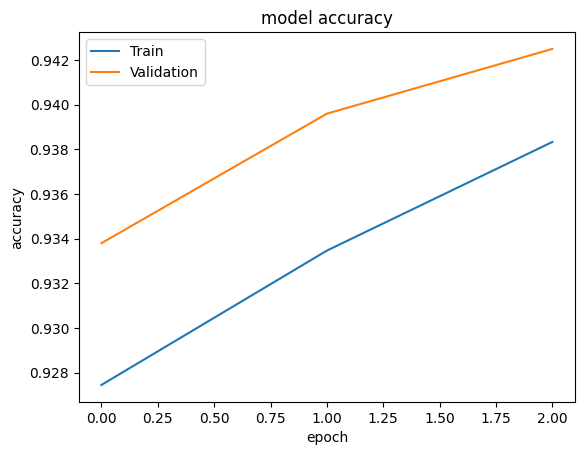

In [32]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [33]:
# Plotting the training loss

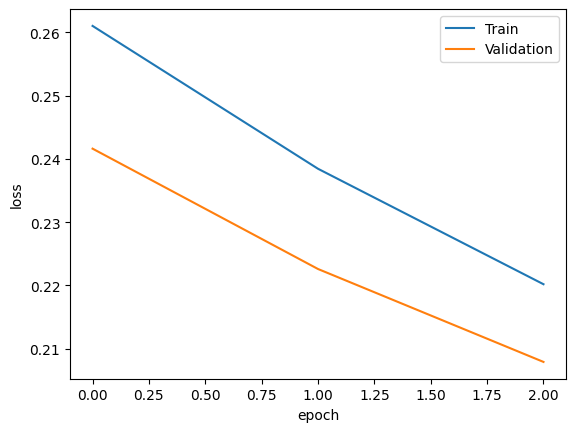

In [35]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train','Validation'], loc='upper right')
plt.show()